# My Segmentation Workflow

This notebook segments a 3D nuclei image and measure their properties

In [1]:
import napari
import os
import watermark

import napari_segment_blobs_and_things_with_membranes as nsbatwm
import napari_simpleitk_image_processing as nsip
import napari_skimage_regionprops as nsr
import pyclesperanto_prototype as cle  # version 0.24.1

from skimage.io import imread, imsave

## 1. Open the image and add it to napari

In [3]:
image0_n = imread("../../data/nuclei3d.tif")

In [4]:
viewer = napari.Viewer()
viewer.add_image(image0_n, name="nuclei3d")

<Image layer 'nuclei3d' at 0x2833b788940>

## 2. Apply voronoi otsu labeling from 'nsbatwm'

To know more how the voronoi-otsu-labeling algorithm works, check out [this notebook](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/20_image_segmentation/11_voronoi_otsu_labeling.html).

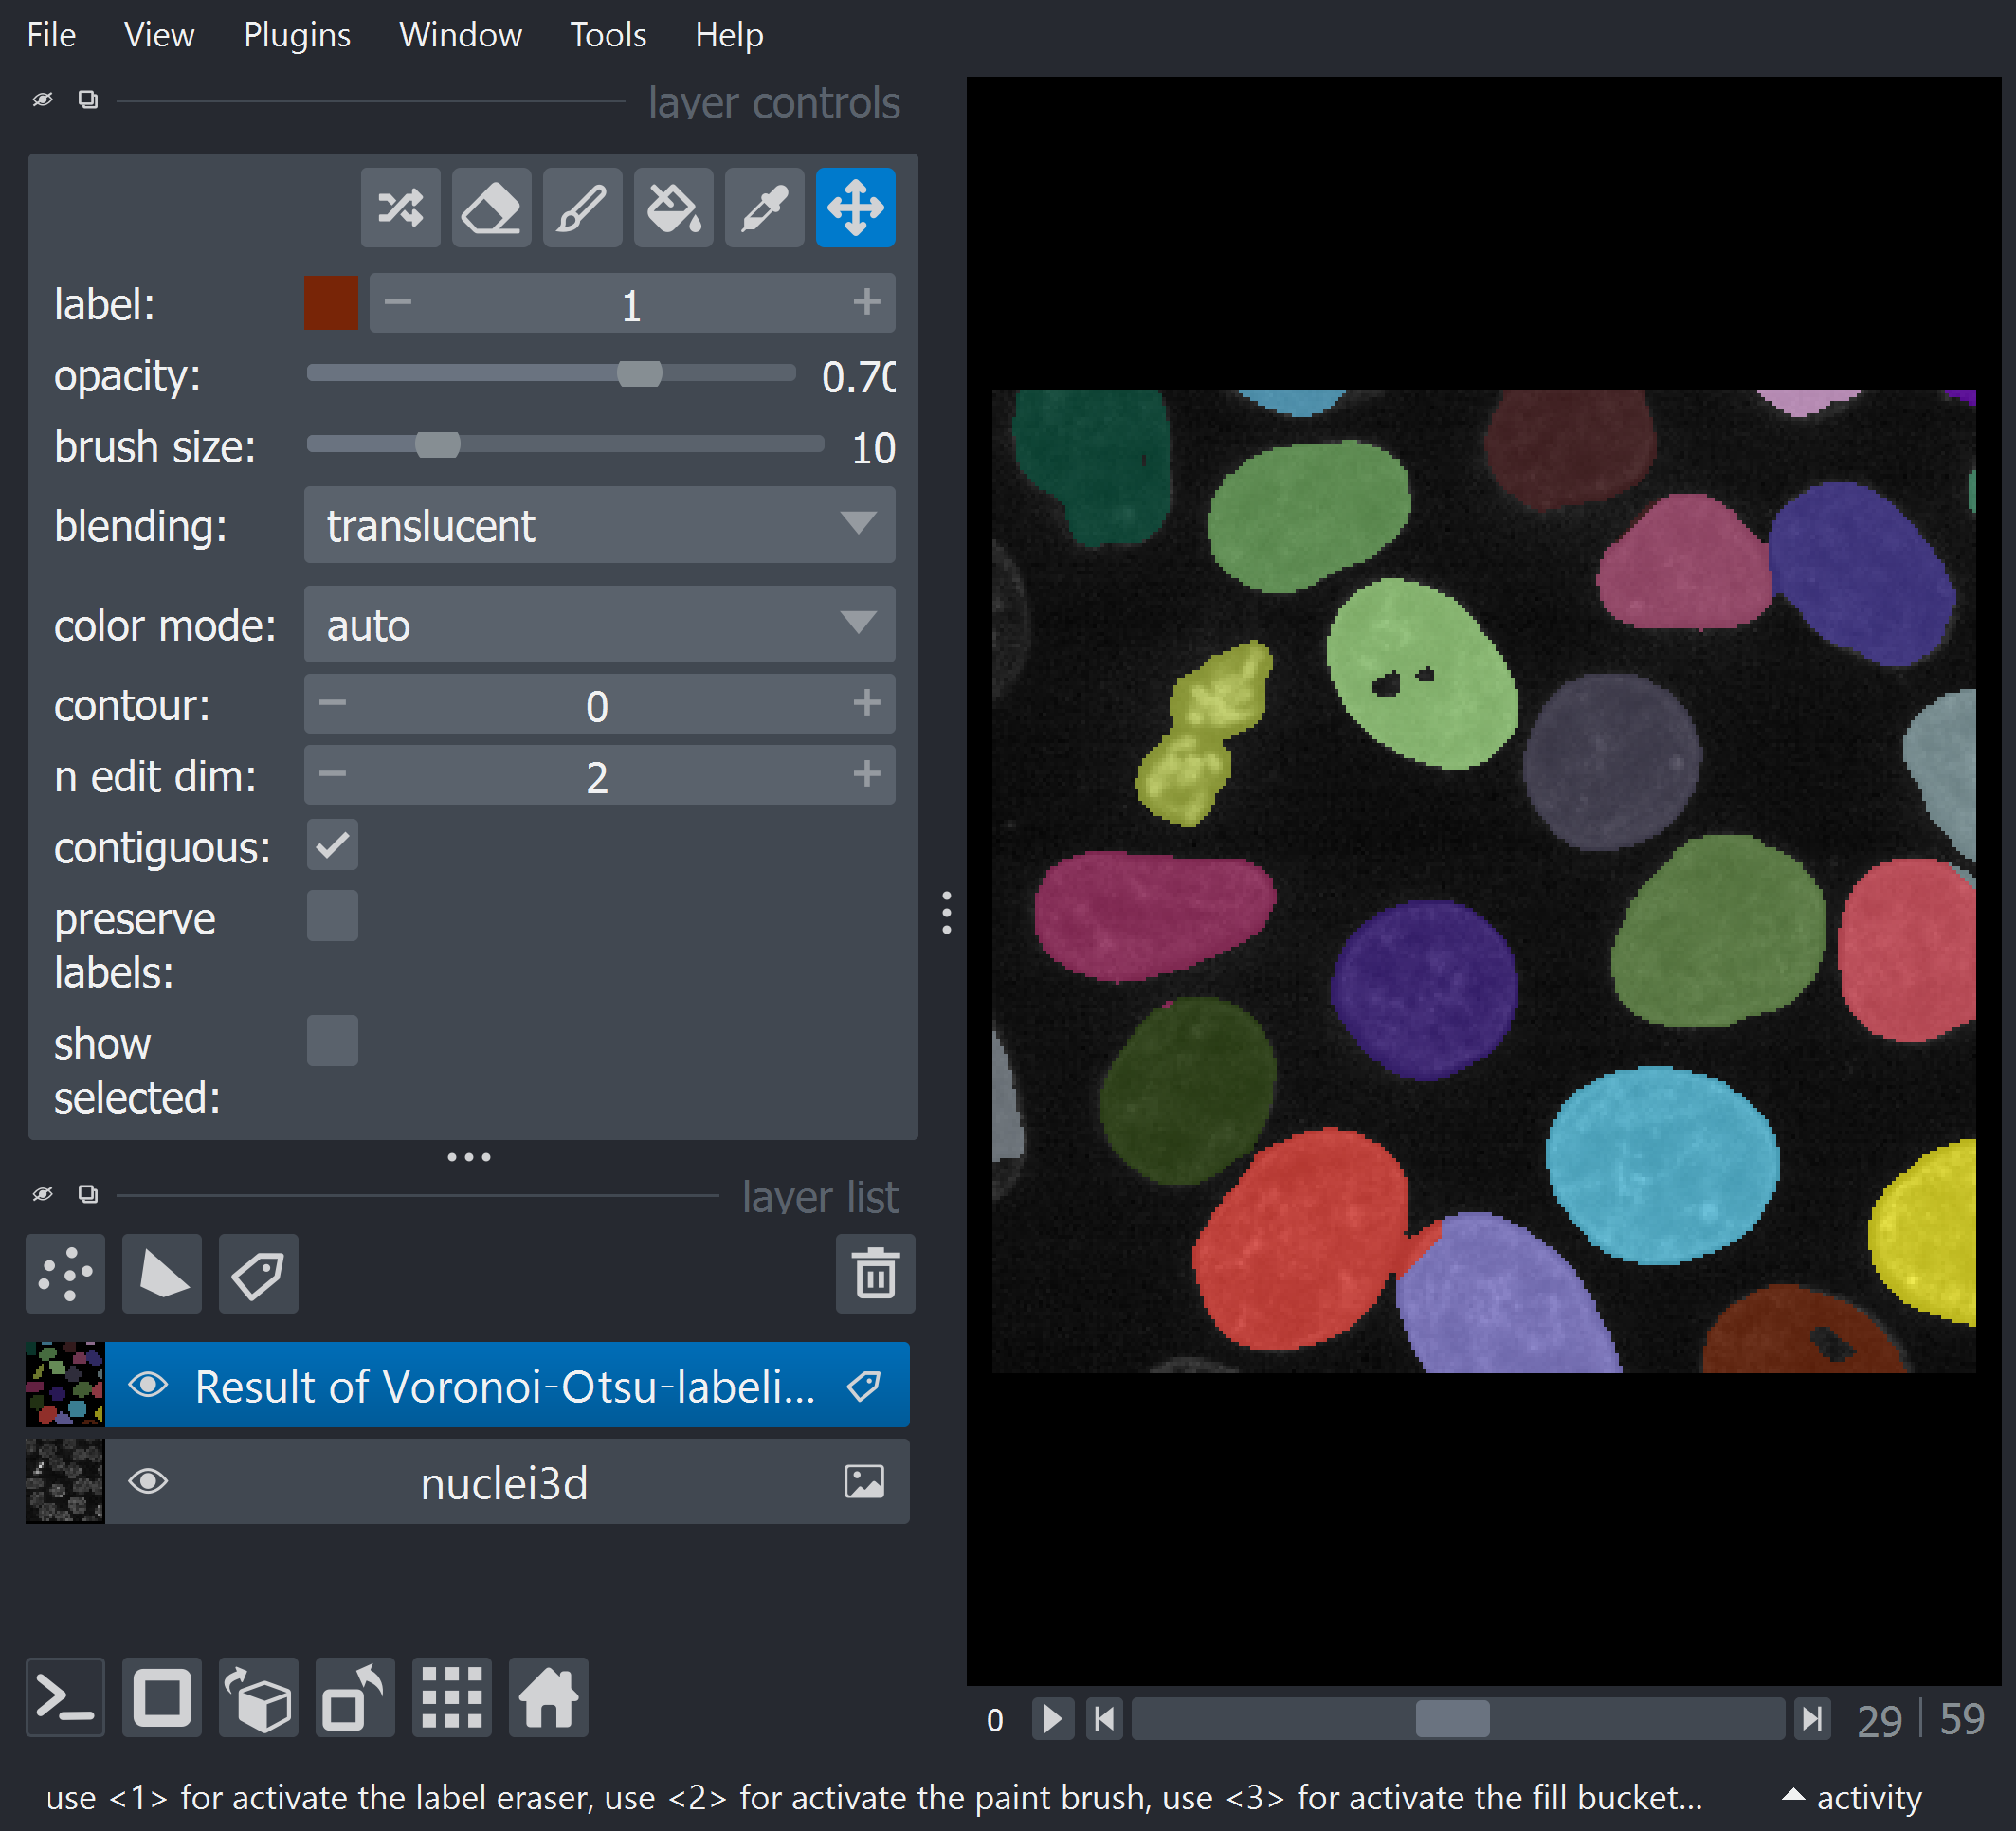

In [5]:
image1_V = nsbatwm.voronoi_otsu_labeling(image0_n, 9.0, 2.0)
viewer.add_labels(image1_V, name='Result of Voronoi-Otsu-labeling (nsbatwm)')
napari.utils.nbscreenshot(viewer)

## 3. Refine labels with Morphological Operators on Labels with pyclesperanto

[Here](https://biapol.github.io/DIGS-BB_LM_Course_Bio-Image_Analysis_2022/04_Image_Processing/6_Morphological_operations.html) you can find more examples and explanations about morphological operators.

#### Dilate labels

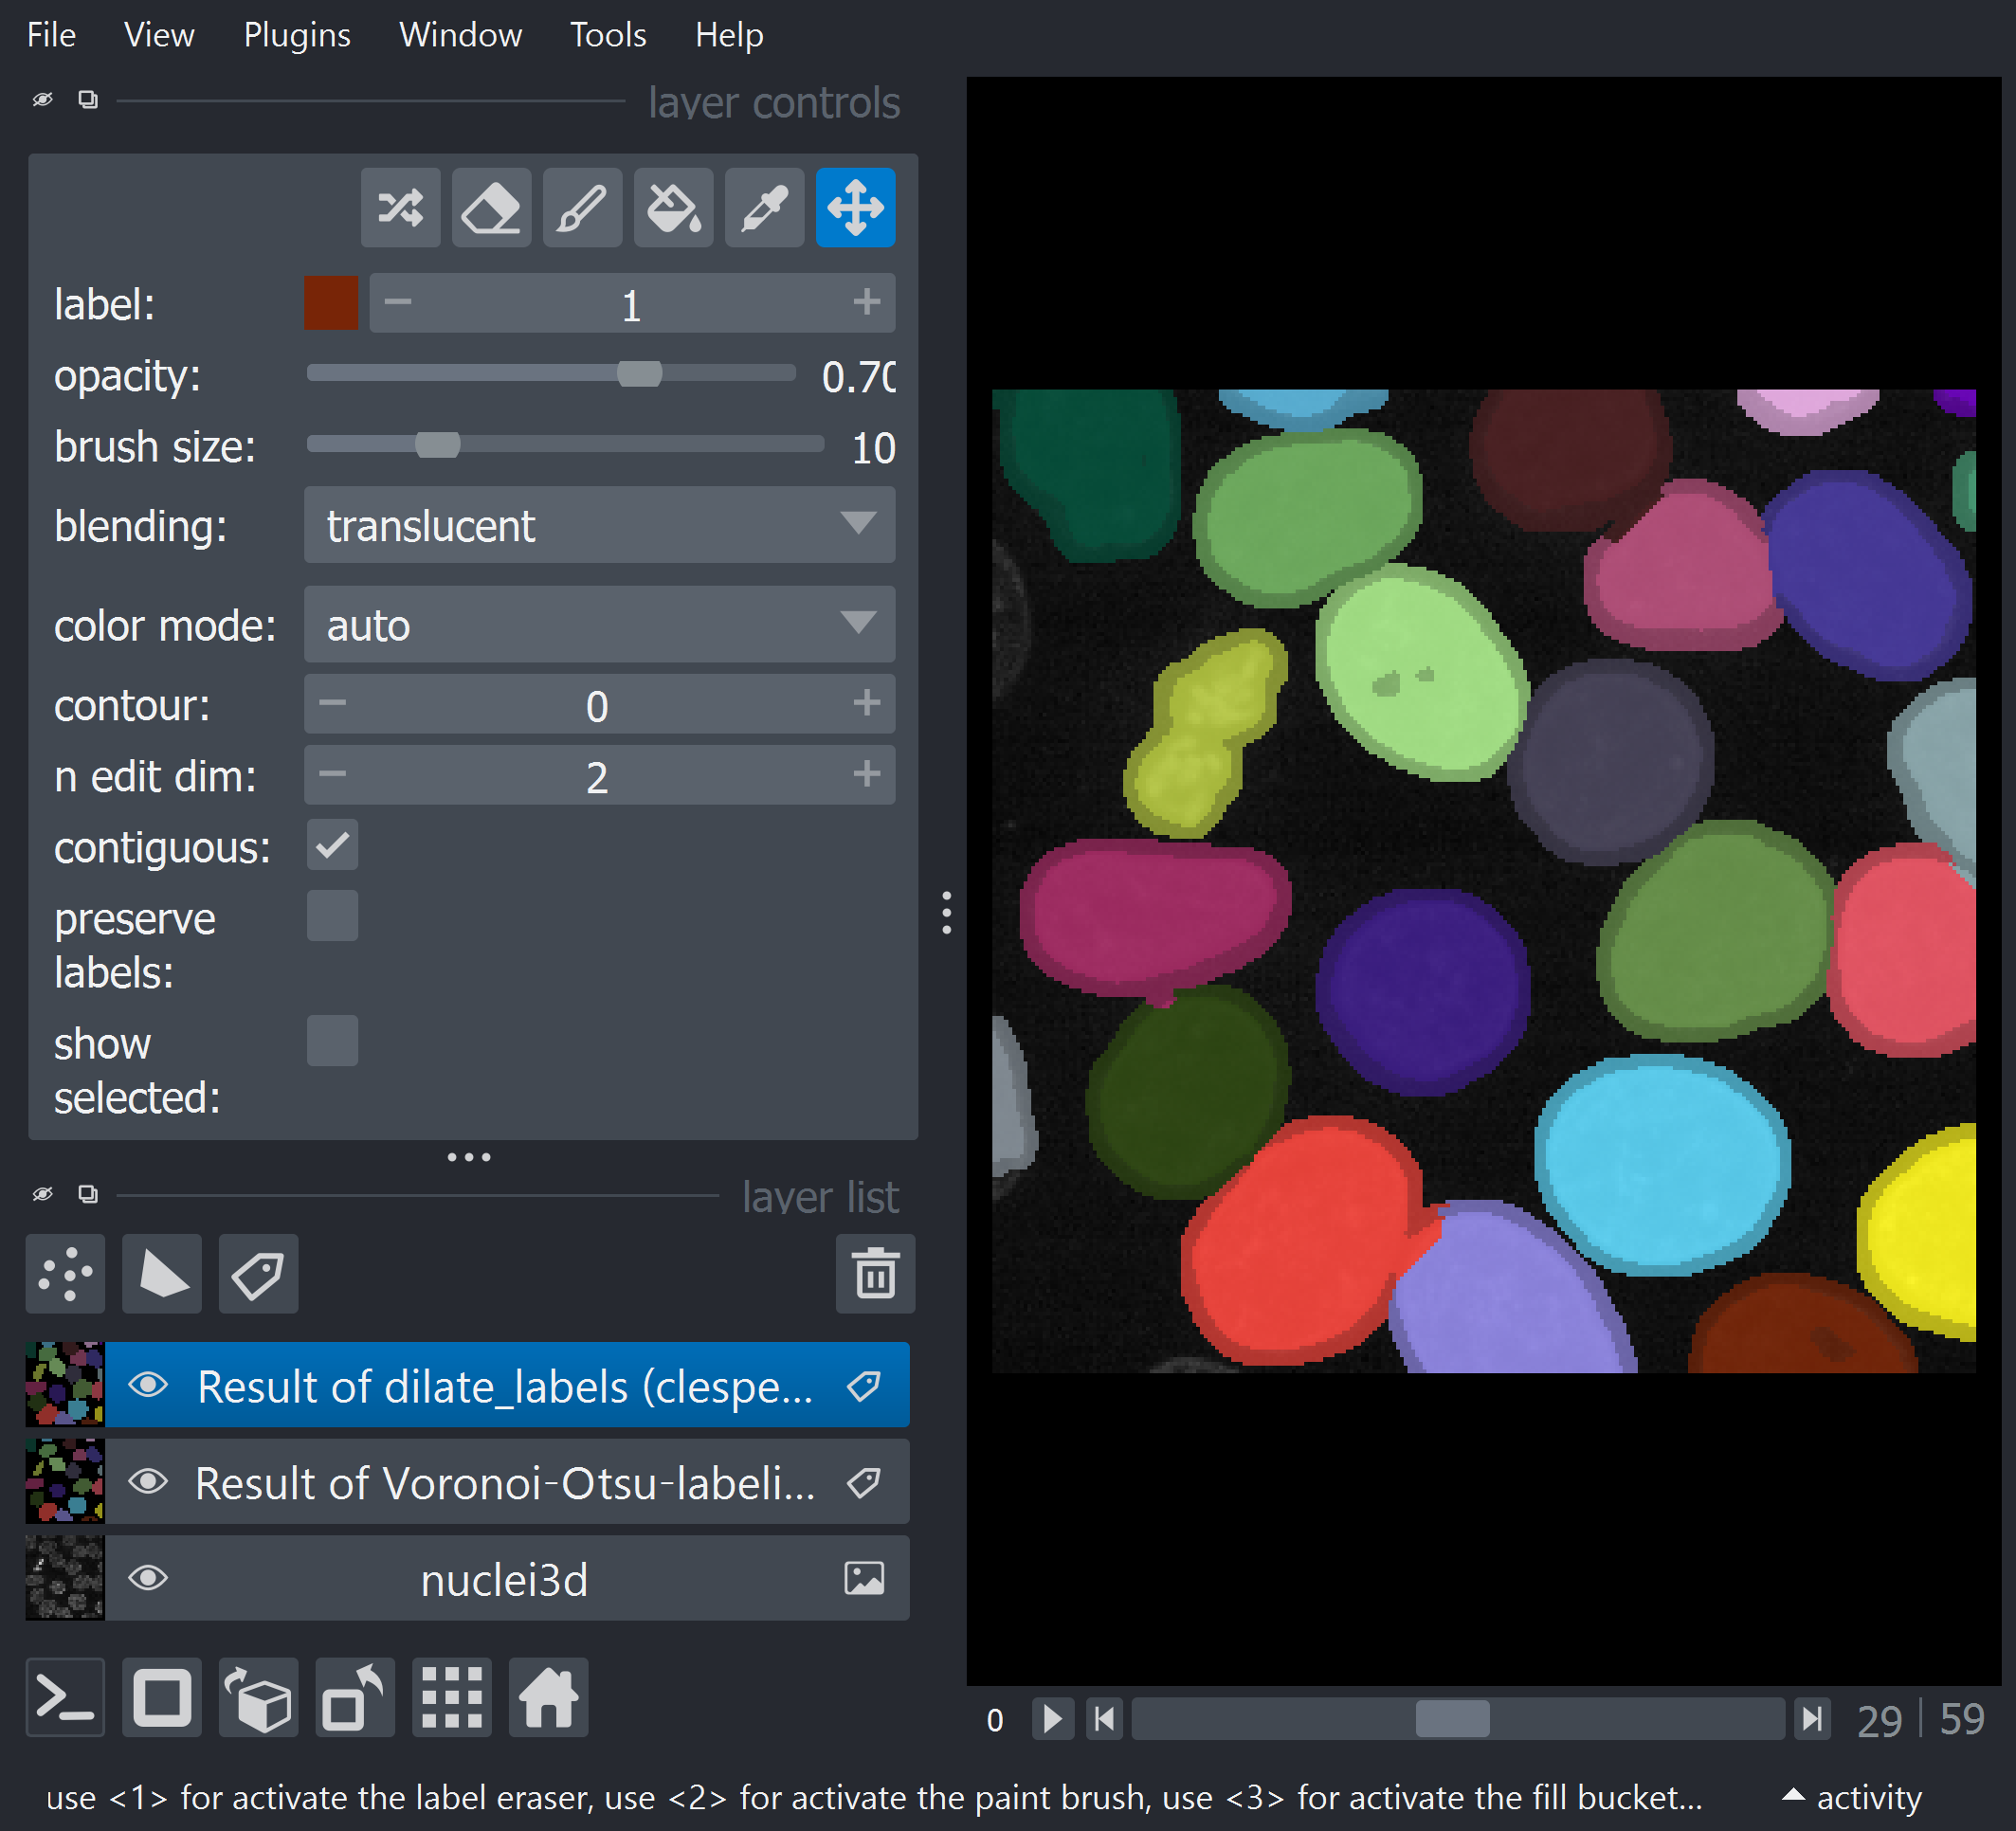

In [6]:
image2_dl = cle.dilate_labels(image1_V, None, 3.0)
viewer.add_labels(image2_dl, name='Result of dilate_labels (clesperanto)')
napari.utils.nbscreenshot(viewer)

#### Erode labels

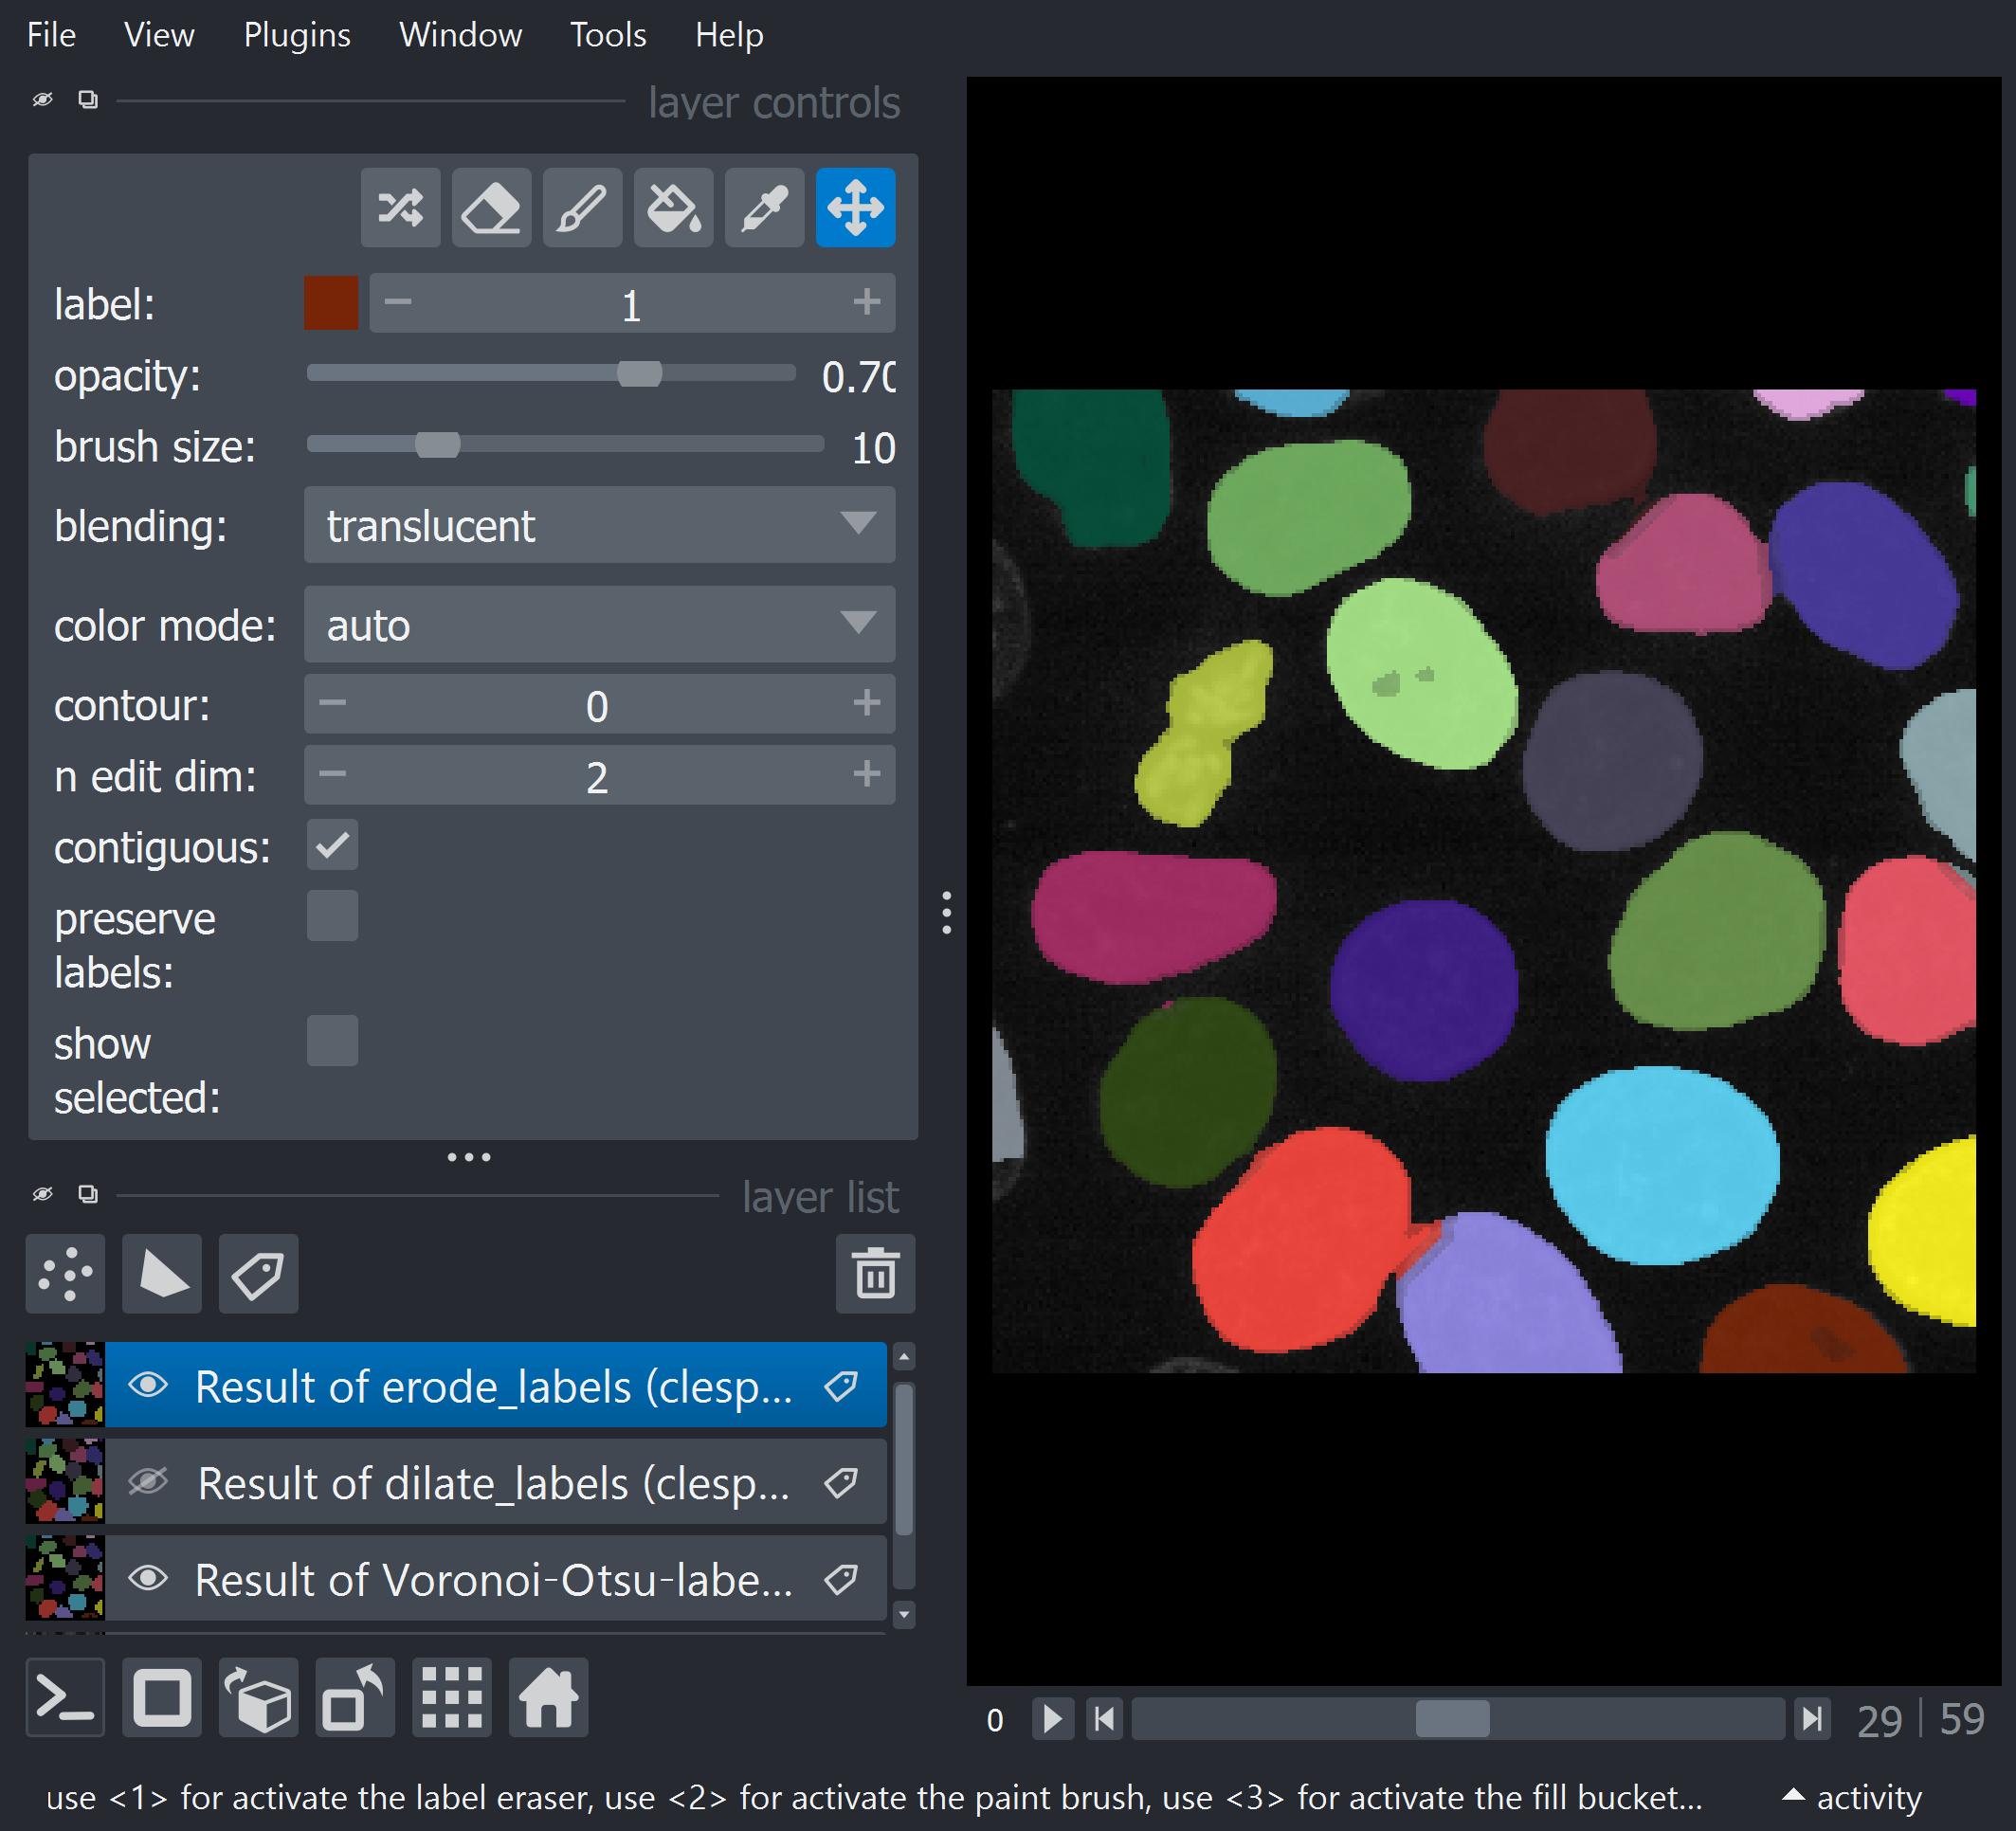

In [7]:
image3_el = cle.erode_labels(image2_dl, None, 3.0, False)
viewer.layers[-1].visible = False # Hide previous label before adding new one
viewer.add_labels(image3_el, name='Result of erode_labels (clesperanto)')
napari.utils.nbscreenshot(viewer)

## 4. Measure properties with 'scikit-image' or 'simpleITK'

To learn more about feature extraction, give a look at [this chapter](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/22_feature_extraction/readme.html).

In [8]:
table = nsr.regionprops_table(image0_n, image3_el, shape = True)
table

,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,extent,local_centroid-0,local_centroid-1,local_centroid-2,solidity,feret_diameter_max,standard_deviation_intensity,minor_axis_length,intermediate_axis_length,major_axis_length
0,1,16825.0,28566.0,31.792071,18350.0,25560.0,11754.354235,3699.0,0.588987,10.589302,13.241010,23.963031,0.916894,54.680892,3045.595138,25.155293,26.092088,54.309845
1,2,54838.0,91988.0,47.136898,57855.0,55624.0,14317.931708,1992.0,0.596143,12.485612,25.474707,29.501915,0.947852,63.206012,4912.203446,30.372853,54.135501,64.821522
2,3,42991.0,75600.0,43.463661,45823.0,55766.0,15110.811100,2940.0,0.568664,13.820660,24.699472,26.972041,0.938197,64.938432,5248.866113,33.472250,43.826328,60.926329
3,4,385.0,680.0,9.025835,432.0,18494.0,12395.077922,5027.0,0.566176,7.607792,1.231169,4.210390,0.891204,17.578396,2726.011829,4.652158,9.525388,18.646306
4,5,36773.0,75400.0,41.258188,39441.0,27219.0,11782.610883,2561.0,0.487706,13.186740,24.736546,24.657249,0.932355,59.883220,2666.804007,28.558874,41.726009,59.894570
5,6,41249.0,73950.0,42.868498,43405.0,34332.0,12029.225630,3272.0,0.557796,13.152513,24.963029,24.472521,0.950328,58.728187,2857.604092,31.068185,43.176069,59.773169
6,7,15192.0,31680.0,30.728317,16903.0,39738.0,13526.128225,3414.0,0.479545,14.979660,21.261651,13.083399,0.898775,49.929951,4051.616960,23.354357,29.885281,46.541270
7,8,2824.0,6498.0,17.537002,3354.0,23378.0,11151.837819,4884.0,0.434595,8.451841,20.710340,2.421034,0.841980,39.849718,2153.747896,8.523441,19.131210,40.216412
8,9,26754.0,45849.0,37.107643,27908.0,65298.0,17148.472004,2561.0,0.583524,15.386821,25.689878,17.109666,0.958650,52.430907,7625.006417,32.096312,33.479648,51.569469
9,10,61565.0,126720.0,48.990487,67980.0,44054.0,13542.197287,3509.0,0.485835,16.191619,29.856152,30.278226,0.905634,68.366659,4293.434525,32.916432,51.972026,70.288305


In [9]:
table_2 = nsip.label_statistics(image0_n, image3_el, shape = True)
table_2

,label,maximum,mean,median,minimum,sigma,sum,variance,elongation,feret_diameter,flatness,roundness,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_ellipsoid_diameter_2,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border
0,1,25560.0,11754.354235,11391.826172,3699.0,3045.685650,197767010.0,9.276201e+06,2.081468,53.497664,1.037240,0.0,24.300168,25.205117,52.463644,3175.320055,15.896035,16825,1017
1,2,55624.0,14317.931708,13951.787109,1992.0,4912.248234,785166739.0,2.413018e+07,1.197394,61.684682,1.782365,0.0,30.196105,53.820472,64.444307,6980.264230,23.568449,54838,0
2,3,55766.0,15110.811100,14975.771484,2940.0,5248.927160,649628880.0,2.755124e+07,1.390176,63.984373,1.309333,0.0,32.538901,42.604263,59.227443,5934.750822,21.731831,42991,1252
3,4,18494.0,12395.077922,12671.806641,5027.0,2729.559016,4772105.0,7.450492e+06,1.957538,16.401219,2.047520,0.0,4.474713,9.162066,17.935088,255.932012,4.512917,385,169
4,5,27219.0,11782.610883,11647.822266,2561.0,2666.840268,433281950.0,7.112037e+06,1.435425,58.745213,1.461052,0.0,28.405739,41.502272,59.573411,5347.738539,20.629094,36773,49
5,6,34332.0,12029.225630,11647.822266,3272.0,2857.638731,496193528.0,8.166099e+06,1.384405,57.844619,1.389720,0.0,30.886289,42.923284,59.423212,5773.330335,21.434249,41249,0
6,7,39738.0,13526.128225,13439.794922,3414.0,4051.750314,205488940.0,1.641668e+07,1.557331,48.507731,1.279645,0.0,22.491523,28.781160,44.821788,2966.384380,15.364159,15192,1070
7,8,23378.0,11151.837819,11135.830078,4884.0,2154.129327,31492790.0,4.640273e+06,2.102136,38.897301,2.244541,0.0,7.985769,17.924384,37.679498,966.185657,8.768501,2824,565
8,9,65298.0,17148.472004,16767.744141,2561.0,7625.148924,458790220.0,5.814290e+07,1.540323,51.000000,1.043100,0.0,31.239850,32.586273,50.193383,4325.901300,18.553821,26754,1301
9,10,44054.0,13542.197287,13183.798828,3509.0,4293.469394,833725376.0,1.843388e+07,1.352426,67.111847,1.578908,0.0,32.671521,51.585333,69.765333,7540.035322,24.495243,61565,0


## 5. Plot data

<Axes: xlabel='area', ylabel='mean_intensity'>

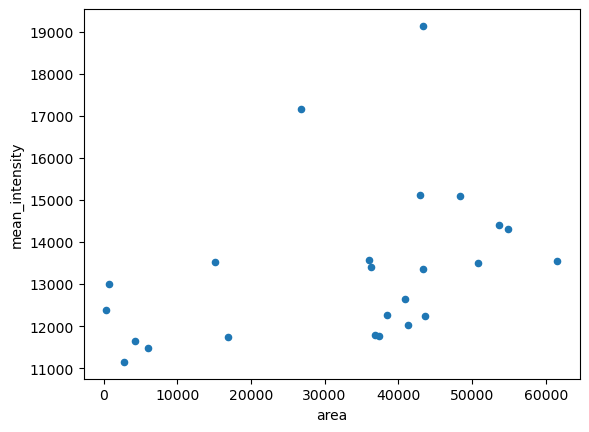

In [20]:
table.plot.scatter('area', 'mean_intensity')

## 6. Save segmentation and table to disk

In [10]:
# Create an "outputs" directory
os.makedirs("../../data/outputs", exist_ok=True)
# Save segmentation results
imsave("../../data/outputs/segmentation_results_nuclei3d.tif", image3_el)

C:\Users\mazo260d\AppData\Local\Temp\ipykernel_16532\2475327127.py:4: UserWarning: ../../data/outputs/segmentation_results_nuclei3d.tif is a low contrast image
  imsave("../../data/outputs/segmentation_results_nuclei3d.tif", image3_el)


In [11]:
# Save table as a .xlsx file
table.to_excel('../../data/outputs/measurements.xlsx')

## Package versions used to run this notebook

In [12]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2024-03-08T11:21:11.115748+01:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.14.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

napari_skimage_regionprops                    : 0.10.1
pyclesperanto_prototype                       : 0.24.1
napari_segment_blobs_and_things_with_membranes: 0.3.6
napari                                        : 0.4.18
napari_simpleitk_image_processing             : 0.4.5
watermark                                     : 2.4.3

